# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
df = pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment in India.csv')

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
print(f"The number of Rows : {df.shape[0]}\nThe number of columns : {df.shape[1]}")

The number of Rows : 768
The number of columns : 7


### Renamimg the column by removing the starting space

In [5]:
new_columns = list(df.columns)
new_columns = [col.strip() for col in new_columns]
df.columns = new_columns

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   740 non-null    object 
 1   Date                                     740 non-null    object 
 2   Frequency                                740 non-null    object 
 3   Estimated Unemployment Rate (%)          740 non-null    float64
 4   Estimated Employed                       740 non-null    float64
 5   Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                     740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


<span style="color:blue;font-size:16px">We have 28 rows will all null values. We can drop these 28 rows altogether. </span>

In [7]:
df.dropna(inplace = True)

In [8]:
df.tail(1)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban



<span style="color:blue;font-size:16px">The last date in the dataset is <b>30 June,  2020 </b> </span>

In [9]:
df.value_counts('Region')

Region
Andhra Pradesh      28
Karnataka           28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Maharashtra         28
Kerala              28
Madhya Pradesh      28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
West Bengal         28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

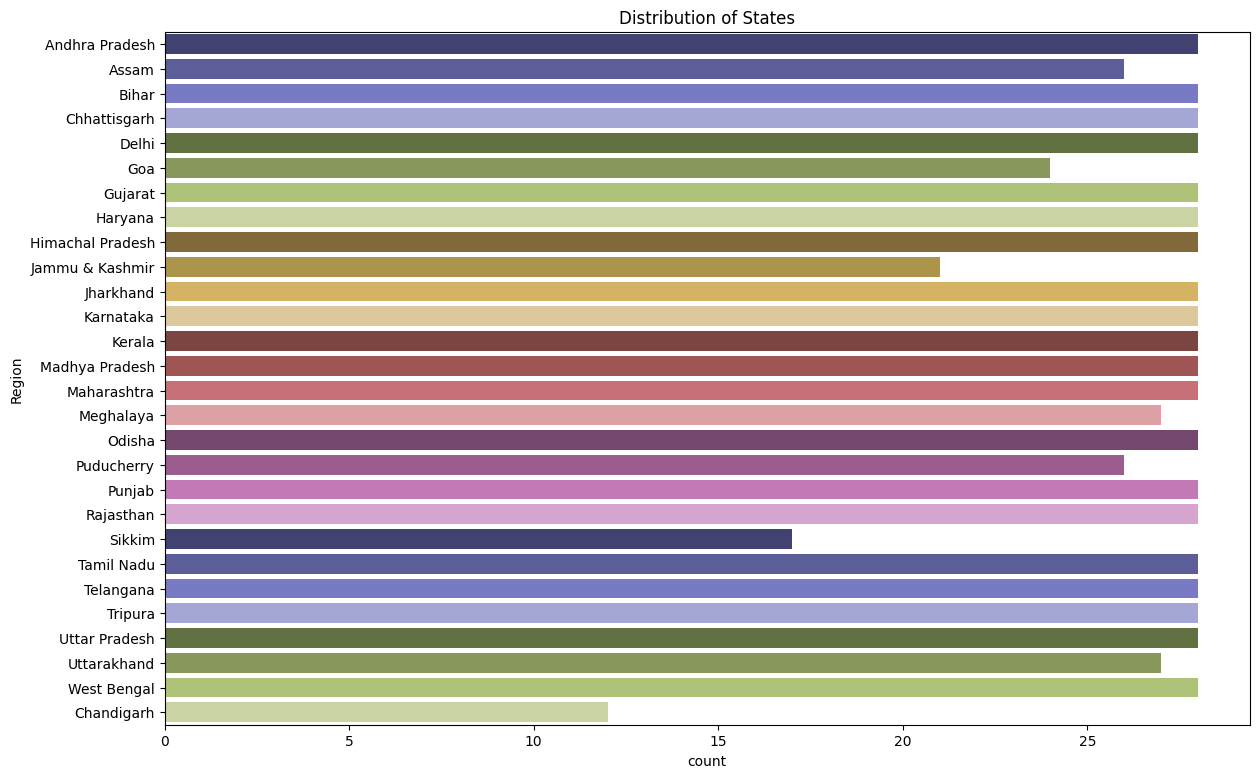

In [10]:
plt.figure(figsize = (14,9))
sns.countplot(y = df['Region'], palette = 'tab20b')
plt.title('Distribution of States');

In [11]:
df['Region'].nunique()

28

<span style="color:blue;font-size:16px">There are <b>28 </b> different regions present in the dataset. </span>

In [12]:
df.value_counts('Area')

Area
Urban    381
Rural    359
Name: count, dtype: int64

<span style="color:blue;font-size:16px">The Area is divided to <b>Urban</b> and <b>Rual</b> </span>

In [13]:
df.value_counts('Frequency')

Frequency
Monthly     381
 Monthly    359
Name: count, dtype: int64

Changing ' Monthly' and 'Monthly' so that everything is same.

In [14]:
df['Frequency'] = df['Frequency'].replace(' Monthly','Monthly')

In [15]:
df.value_counts('Frequency')

Frequency
Monthly    740
Name: count, dtype: int64


<span style="color:blue;font-size:16px">This feature is same for all the rows. The unemployment rate has been calculated monthly. So, we can drop the feature 'Frequency'</span>

In [16]:
df.drop('Frequency', axis = 1, inplace = True)

#### Getting the Month, Year and MM-YYYY from the feature "Date"

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['MM YYYY'] = df['Date'].dt.strftime('%m-%Y')

In [18]:
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Year,MM YYYY
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,5,2019,05-2019
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,6,2019,06-2019
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,7,2019,07-2019
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,8,2019,08-2019
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,9,2019,09-2019


# Exploratory Data Analysis

#### Dividing Dataset to Urban and Rural for Analysis

In [19]:
rural = df[df.Area == 'Rural']
urban = df[df.Area == 'Urban']

In [20]:
rural.pivot_table(index = 'MM YYYY', values = 'Estimated Unemployment Rate (%)', aggfunc = np.mean)

,Estimated Unemployment Rate (%)
MM YYYY,
01-2020,7.842692
02-2020,8.752308
03-2020,9.683333
04-2020,21.746000
05-2019,7.068077
05-2020,21.210800
06-2019,8.201154
06-2020,11.825200
07-2019,7.741923


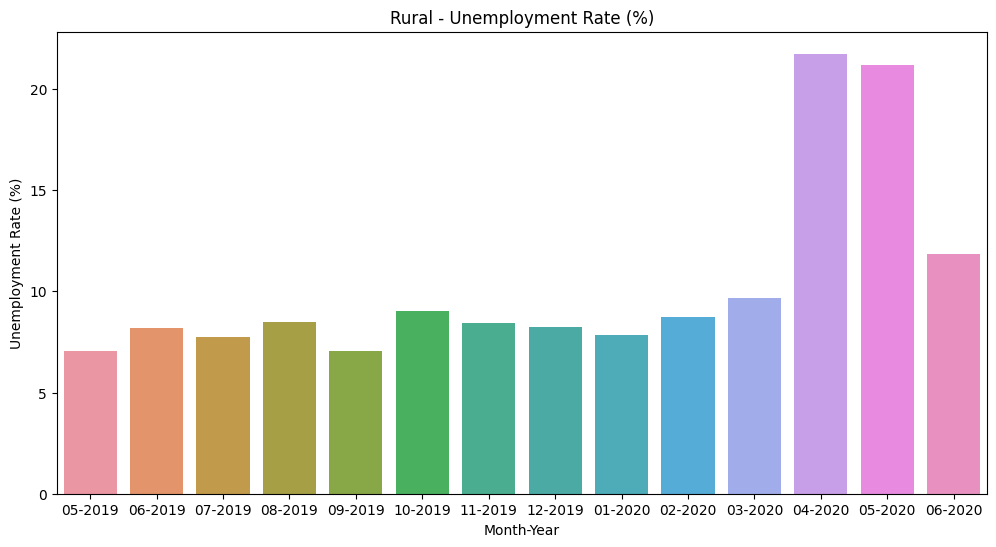

In [21]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Unemployment Rate (%)', data = rural, errorbar=('ci', 0))
plt.xlabel('Month-Year')
plt.ylabel('Unemployment Rate (%)')
plt.title("Rural - Unemployment Rate (%)");

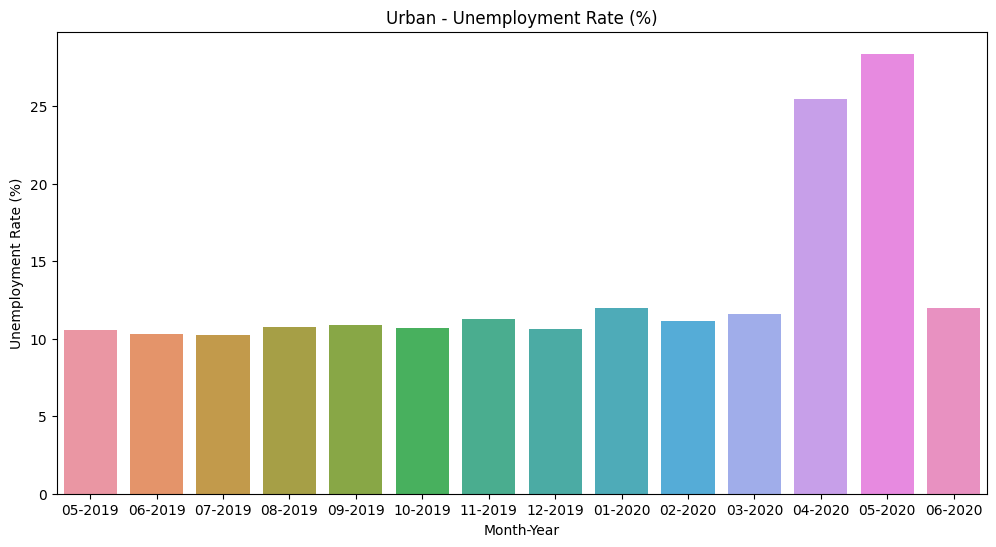

In [22]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Unemployment Rate (%)', data = urban, errorbar=('ci', 0))
plt.xlabel('Month-Year')
plt.ylabel('Unemployment Rate (%)')
plt.title("Urban - Unemployment Rate (%)");

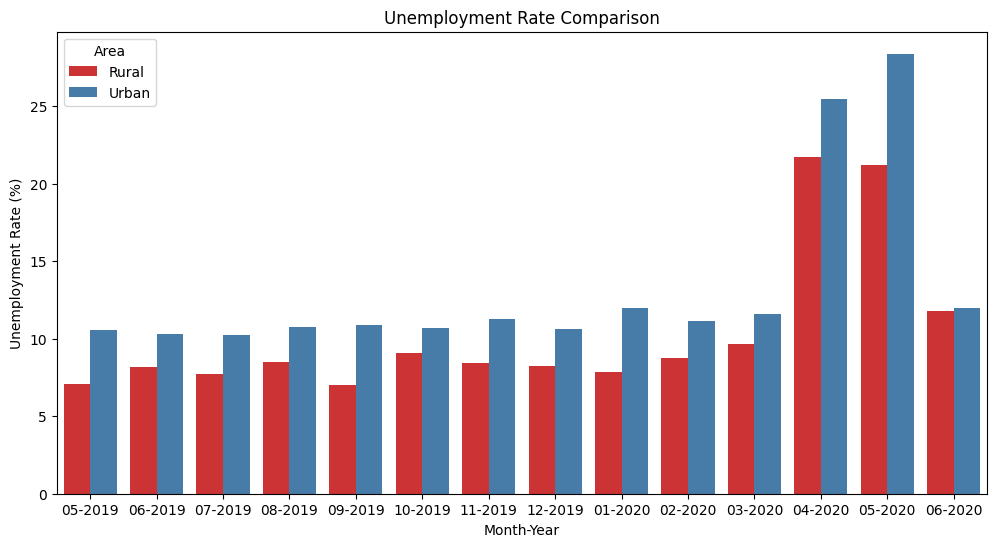

In [23]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Unemployment Rate (%)', data = df, 
            hue = 'Area', errorbar=('ci', 0), palette = 'Set1')
plt.xlabel('Month-Year')
plt.ylabel('Unemployment Rate (%)')
plt.title("Unemployment Rate Comparison");

<span style="color:blue;font-size:16px">Unemployment Rate is more in Rural areas than in Urban areas from May 2019 to May 2020. <br> In, June 2020, the Unemployment rates in Urban and Rural Areas are almost the same. <br> The Unemployment Rate shoots up in the month of April and May in 2020. This is the time COVID started affecting the economy.</span>

In [24]:
urban['Region'].nunique()

28

In [25]:
rural['Region'].nunique()

27

In [26]:
set(urban['Region'].unique()) - set(rural['Region'].unique())

{'Chandigarh'}

<span style="color:blue;font-size:16px"><b>Chandigarh</b> has values for only Urban areas. </span>

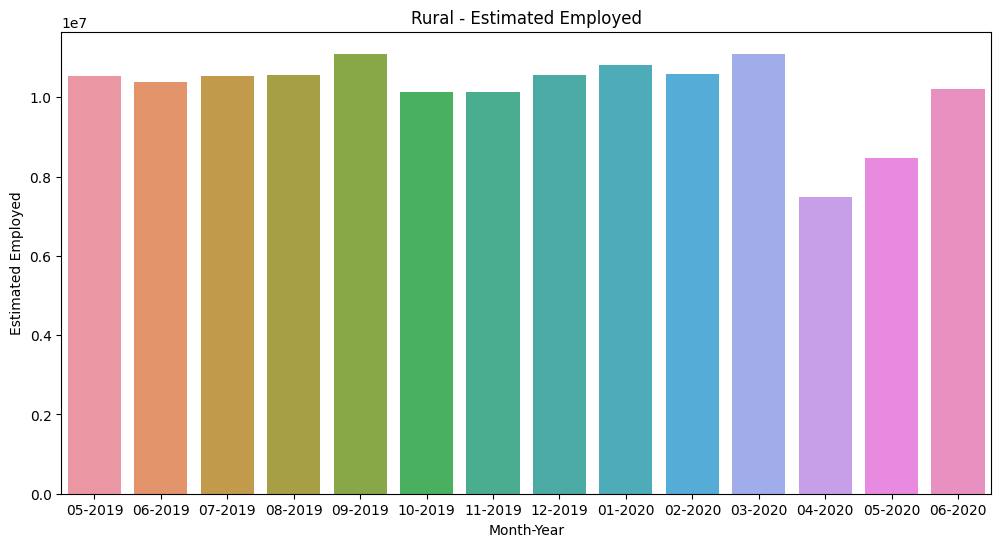

In [27]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Employed', data = rural, errorbar=('ci', 0))
plt.xlabel('Month-Year')
plt.ylabel('Estimated Employed')
plt.title("Rural - Estimated Employed");

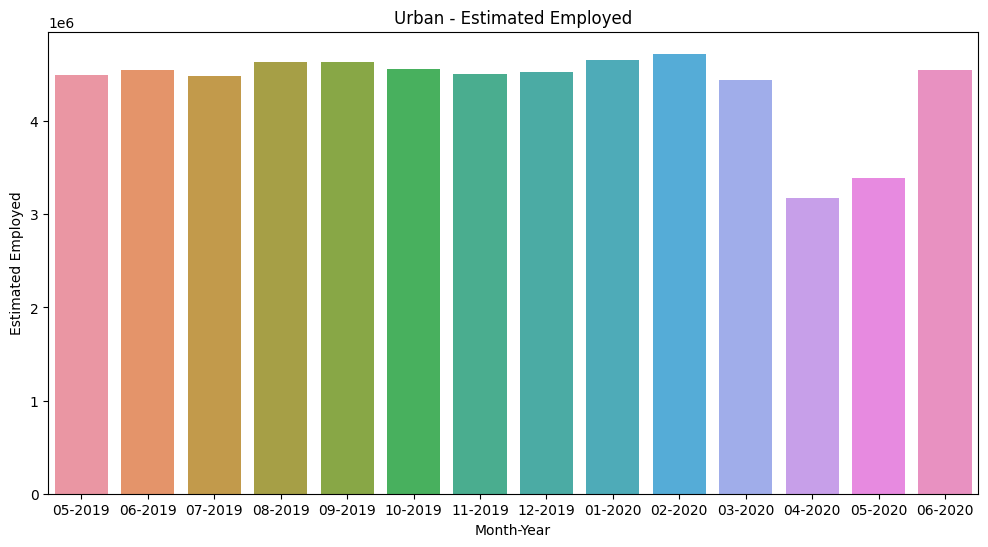

In [28]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Employed', data = urban,errorbar=('ci', 0))
plt.xlabel('Month-Year')
plt.ylabel('Estimated Employed')
plt.title("Urban - Estimated Employed");

<span style="color:blue;font-size:16px">Employed population is more in Urban areas than in Rural areas. <br> The Employed Poplution experiences a sudden decrease in the month of April and May in the year 2020.</span>

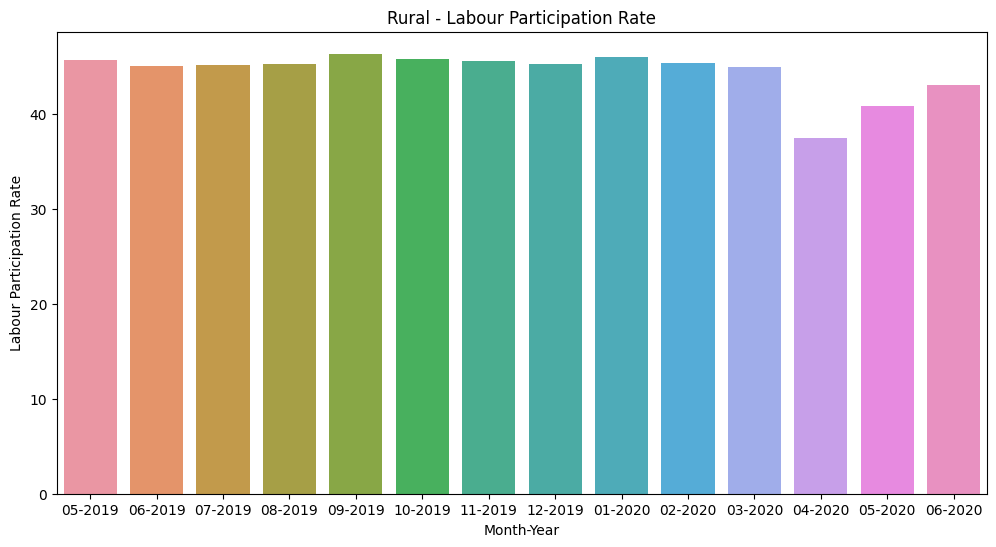

In [29]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Labour Participation Rate (%)', data = rural, errorbar=('ci', 0))
plt.xlabel('Month-Year')
plt.ylabel('Labour Participation Rate')
plt.title("Rural - Labour Participation Rate");

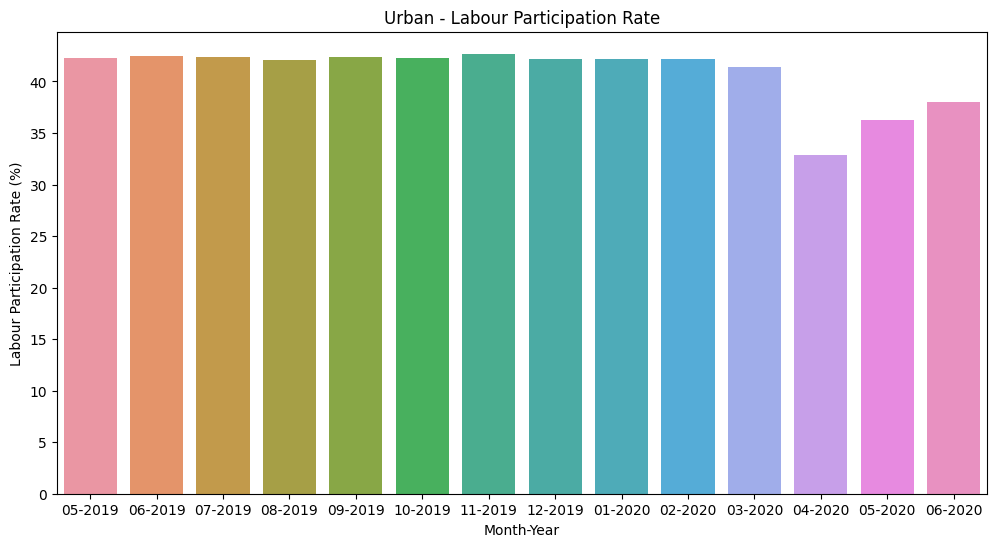

In [30]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Labour Participation Rate (%)', data = urban,errorbar=('ci', 0))
plt.xlabel('Month-Year')
plt.ylabel('Labour Participation Rate (%)')
plt.title("Urban - Labour Participation Rate");

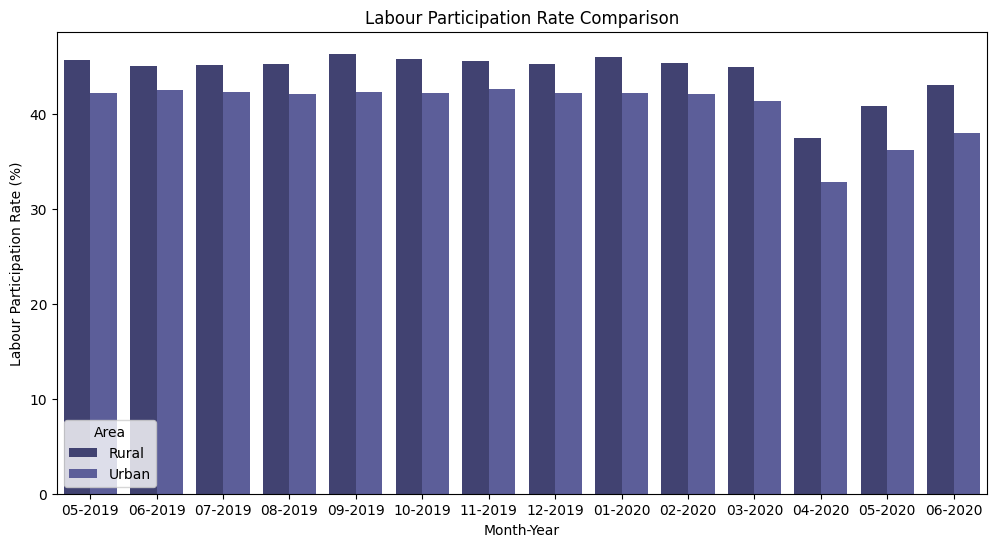

In [31]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Labour Participation Rate (%)', data = df, 
            hue = 'Area', errorbar=('ci', 0), palette = 'tab20b')
plt.xlabel('Month-Year')
plt.ylabel('Labour Participation Rate (%)')
plt.title("Labour Participation Rate Comparison");

<span style="color:blue;font-size:16px">Labour Participation Rate is more in Rural areas than in Urban areas.  <br> The Labour Participation Rate suddenly decreased in the month of April in the year 2020. </span>

### Mapping Zones

In [32]:
central = ["Chhattisgarh","Madhya Pradesh","Uttar Pradesh","Uttarakhand"]
eastern = ["Bihar", "Jharkhand", 'Odisha' ,'West Bengal']
northeast = ["Arunachal Pradesh" ,"Assam","Meghalaya", "Mizoram", "Nagaland", "Manipur", "Sikkim", "Tripura"]
northern = ["Haryana", "Chandigarh","Delhi","Himachal Pradesh", "Jammu & Kashmir", "Punjab", "Rajasthan"]
southern = [ "Andhra Pradesh", "Karnataka","Puducherry" ,"Kerala","Tamil Nadu", "Telangana"]
western = ['Goa', 'Gujarat', 'Maharashtra']

In [33]:
def zone_map(state):
    if state in central:
        return 'Central'
    elif state in eastern:
        return 'Eastern'
    elif state in northeast:
        return 'North-Eastern'
    elif state in northern:
        return 'Northern'
    elif state in southern:
        return 'Southern'
    elif state in western:
        return 'Western'

In [34]:
df['Zone'] = df['Region'].apply(lambda x : zone_map(x))

In [35]:
df.value_counts('Zone')

Zone
Northern         173
Southern         166
Eastern          112
Central          111
North-Eastern     98
Western           80
Name: count, dtype: int64

In [36]:
zones = list(df['Zone'].unique())
zones

['Southern', 'North-Eastern', 'Eastern', 'Central', 'Northern', 'Western']

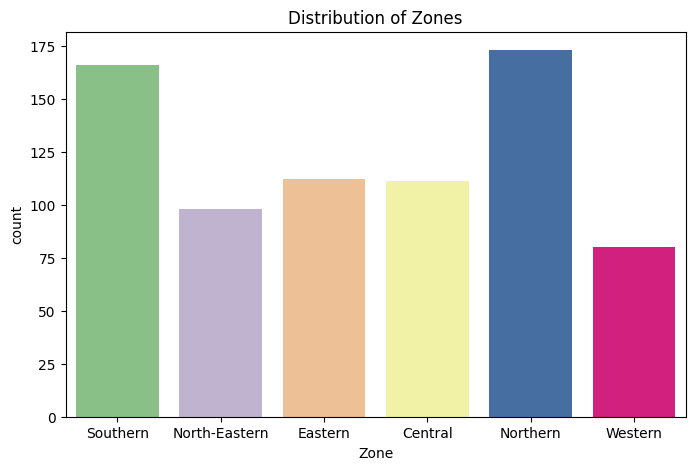

In [37]:
plt.figure(figsize = (8,5))
sns.countplot(x = df['Zone'], palette = 'Accent')
plt.title('Distribution of Zones');

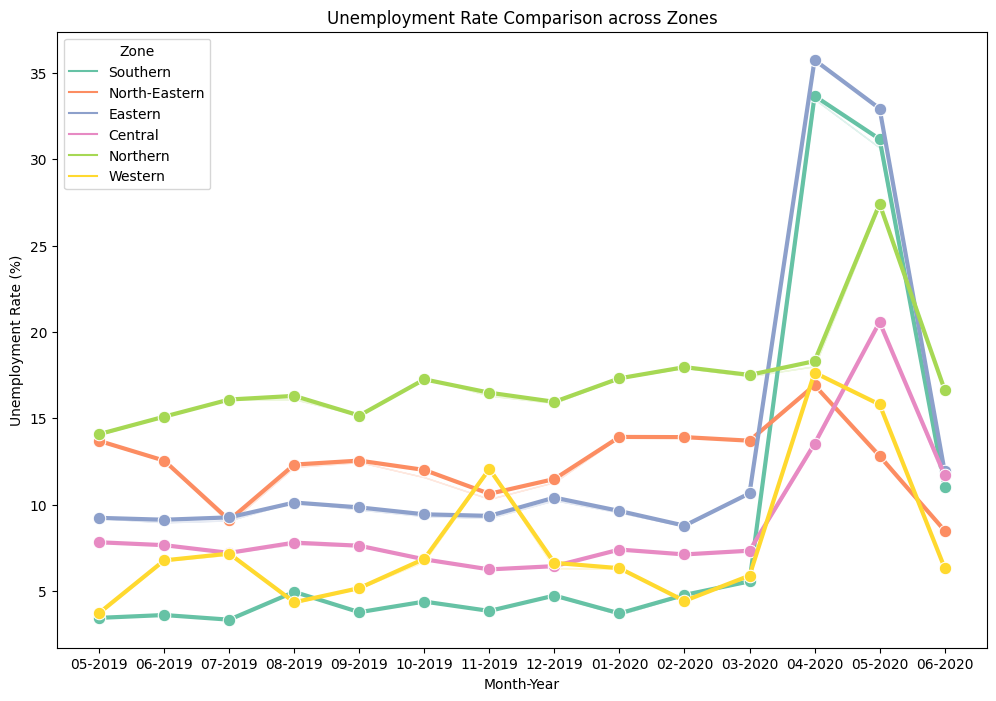

In [38]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'MM YYYY', y = 'Estimated Unemployment Rate (%)', data = df, 
            hue = 'Zone', errorbar=('ci', 0), palette = 'Set2',
             marker='o', markersize=9, linewidth=3)
plt.xlabel('Month-Year')
plt.ylabel('Unemployment Rate (%)')
plt.title("Unemployment Rate Comparison across Zones");

<span style="color:blue;font-size:16px">The Southern and Eastern Regions have higher Unemployment Rates (sudden increase) in April-May 2020 as compared to other southern regions.<br>Northern and Central Regions have higher unemployment rates in May 2020 as compared to April 2020. Whereas, in other regions, the unemployment rate decreased in May 2020. <br> There is a sudden increase in unemployment rate in Western Regions in November 2019. <br>The Northern and North-Eastern Regions had the same unemployment rate in May 2019. But in the further months, the unemployment rate in Northern Regions increased compared to North-Eastern regions. </span>

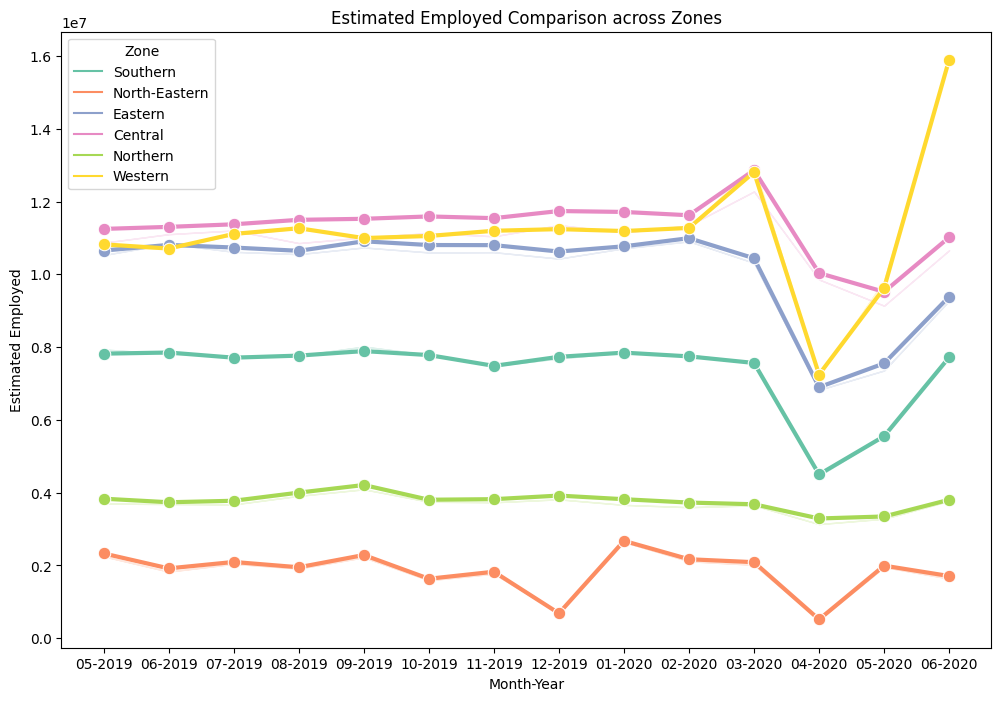

In [39]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'MM YYYY', y = 'Estimated Employed', data = df, 
            hue = 'Zone', errorbar=('ci', 0), palette = 'Set2',
             marker='o', markersize=9, linewidth=3)
plt.xlabel('Month-Year')
plt.ylabel('Estimated Employed')
plt.title("Estimated Employed Comparison across Zones");

<span style="color:blue;font-size:16px">The Estimated Employed Population suddenly decreased in April 2020 in all regions except Northern region. The decrease is mild (0.4 crores to around 0.38 crores) in the Northern region compared to all the other regions.<br>The Employed Population increased suddenly in June 2020 in the Western Region. Went from almost 1 crore to 1.6 crores.<br> There is a sudden increase in unemployment rate in Western Regions in November 2019. <br>The  North-Eastern Region experienced a decrease ( to 0.7 crores ) in Employed population in December 2019 and April 2020. <br> The steepest dip is observed in the Western Region in April 2020 (13. crores to 0.76 crores)</span>

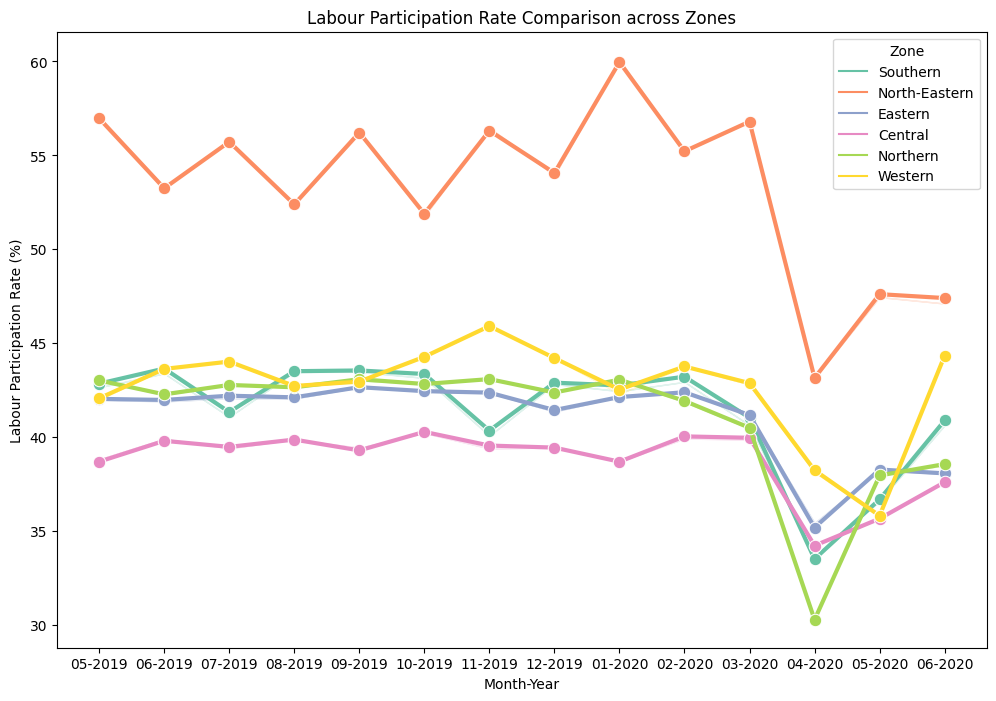

In [40]:
plt.figure(figsize = (12,8))
sns.lineplot(x = 'MM YYYY', y = 'Estimated Labour Participation Rate (%)', data = df, 
            hue = 'Zone', errorbar=('ci', 0), palette = 'Set2',
             marker='o', markersize=9, linewidth=3)
plt.xlabel('Month-Year')
plt.ylabel('Labour Participation Rate (%)')
plt.title("Labour Participation Rate Comparison across Zones");

<span style="color:blue;font-size:16px">The Labor Participation Rate in the North-Eastern is the highest at all times, compared to all other regions.<br>The decrease in Labor Participation Rate in most in Northeastern region in April 2020 (from 57% to 44%)  <br> </span>

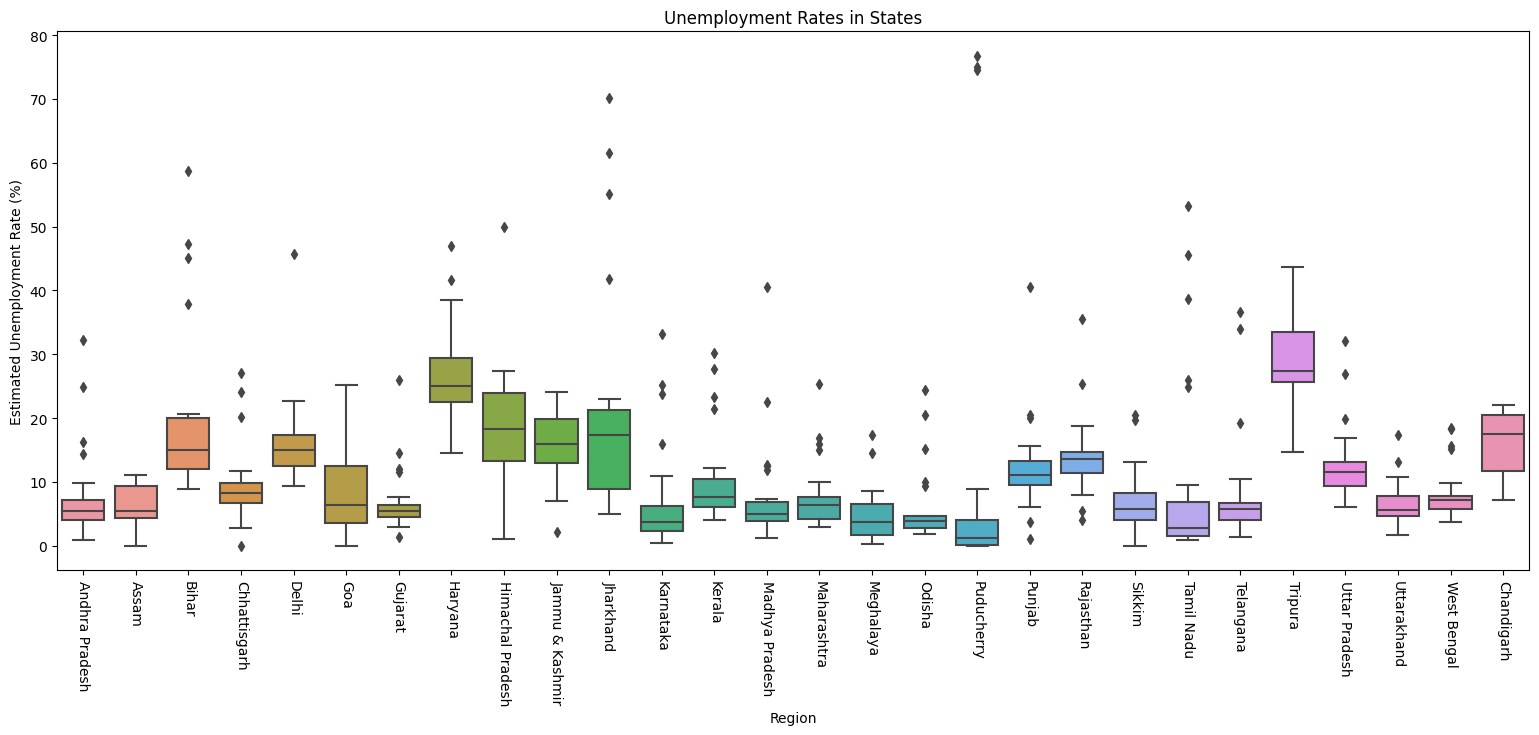

In [41]:
plt.figure(figsize=(19, 7))

sns.boxplot(df, x = 'Region', y = 'Estimated Unemployment Rate (%)')
plt.xticks(rotation = -90)
plt.title("Unemployment Rates in States");

#### Unemployment Rates is higher in :
- <span style="color:blue;font-size:16px">Tripura</span>
- <span style="color:blue;font-size:16px">Haryana</span>
- <span style="color:blue;font-size:16px">Chandigarh</span>
- <span style="color:blue;font-size:16px">Bihar</span>
- <span style="color:blue;font-size:16px">Himachal Pradesh</span>

### SOUTHERN REGION

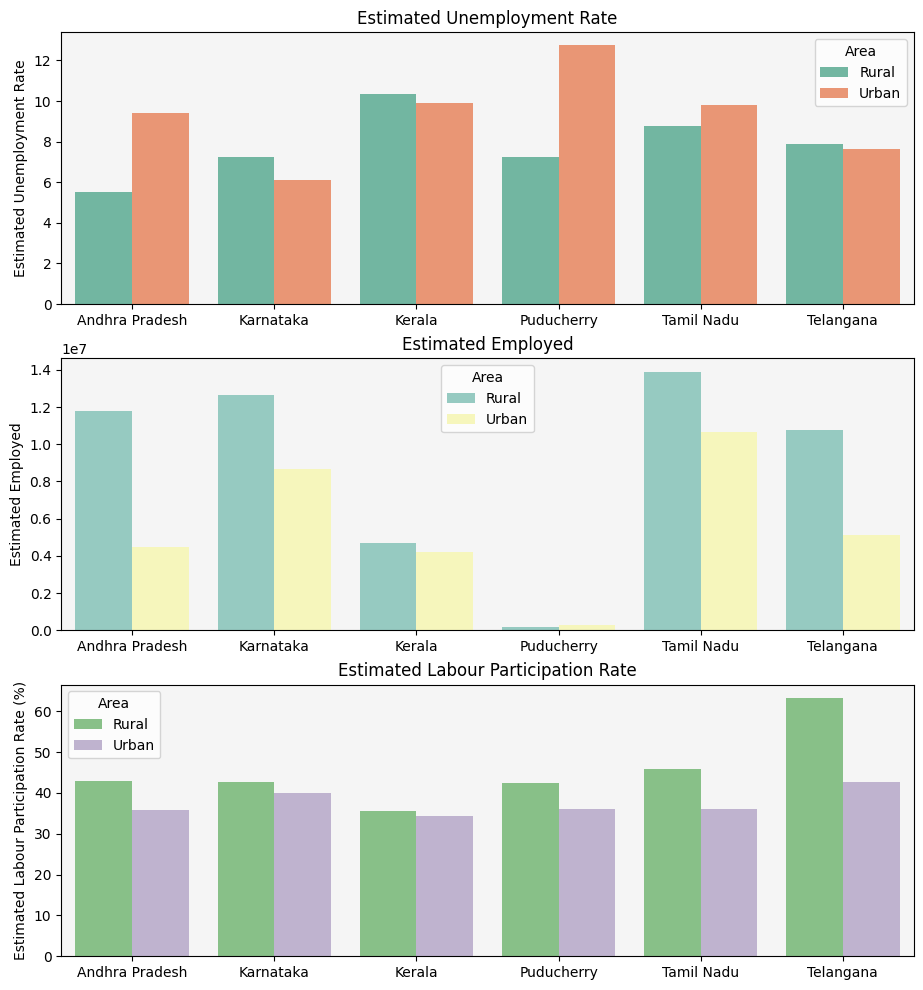

In [42]:
fig, axes = plt.subplots(3, 1, figsize=(11, 12))

sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data = df[(df['Zone'] == f'{zones[0]}')], 
            hue = 'Area',ax=axes[0], palette='Set2',  errorbar=('ci', 0))
axes[0].set_xlabel('')
axes[0].set_ylabel('Estimated Unemployment Rate')
axes[0].set_facecolor('#f5f5f5')
axes[0].set_title(f"Estimated Unemployment Rate")

sns.barplot(x='Region', y='Estimated Employed', data = df[(df['Zone'] == f'{zones[0]}')], 
            hue = 'Area',ax=axes[1], palette='Set3', errorbar=('ci', 0))
axes[1].set_xlabel('')
axes[1].set_ylabel('Estimated Employed')
axes[1].set_facecolor('#f5f5f5')
axes[1].set_title(f"Estimated Employed")

sns.barplot(x='Region', y='Estimated Labour Participation Rate (%)', data = df[(df['Zone'] == f'{zones[0]}')], 
            hue = 'Area',ax=axes[2], palette='Accent',errorbar=('ci', 0))
axes[2].set_xlabel('')
axes[2].set_ylabel('Estimated Labour Participation Rate (%)')
axes[2].set_facecolor('#f5f5f5')
axes[2].set_title(f"Estimated Labour Participation Rate");

#### Southern Region Observations :
- <span style="color:blue;font-size:16px">Unemployment Rates in Puducherry Urban is around <b>1.64 Times</b> the Puducherry Rural.</span>
- <span style="color:blue;font-size:16px">The Unemployment Rate is <b>Higher</b> in Urban areas than in Rural areas in Karnataka, Kerala and Telangana. The case is opposite for Andhra Pradesh, Puducherry and Tamil Nadu.</span>
- <span style="color:blue;font-size:16px">The Employed Population shows <b>No change</b> in <b>Puducherry</b> Urban and Rural.</span>
- <span style="color:blue;font-size:16px">The Employed Population is <b>Higher</b> in Rural areas than Urban areas.</span>
- <span style="color:blue;font-size:16px">The Labor Participation is <b>Higher</b> in Rural areas than Urban areas.</span>

### NORTHEASTERN REGION

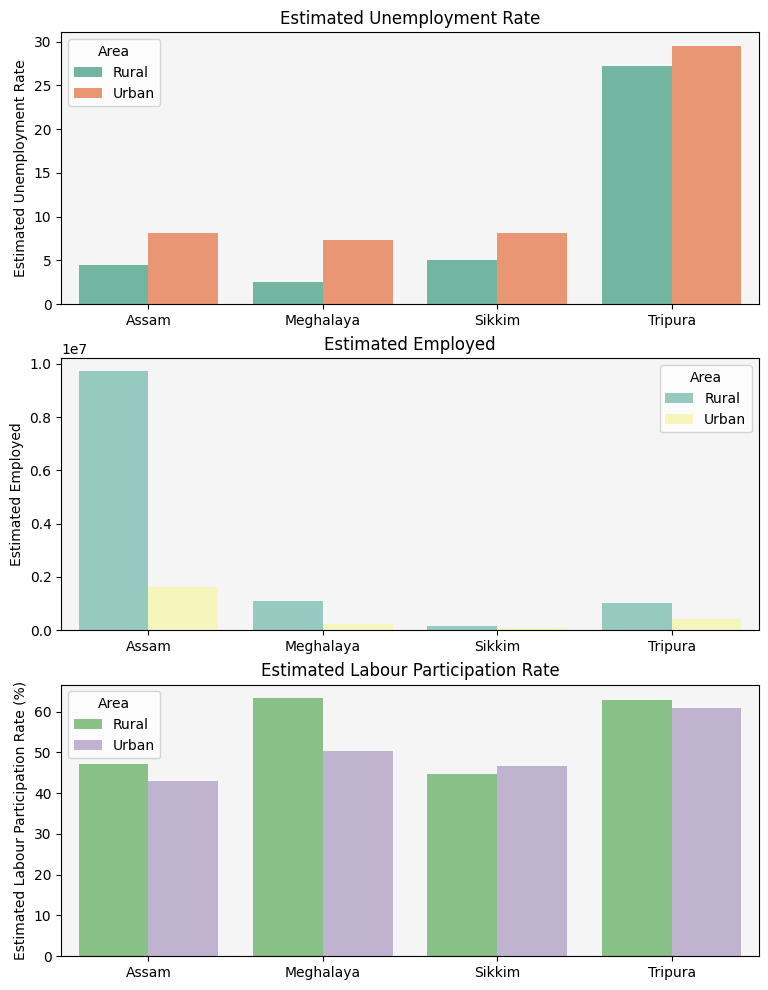

In [43]:
fig, axes = plt.subplots(3, 1, figsize=(9, 12))

sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data = df[(df['Zone'] == f'{zones[1]}')], 
            hue = 'Area',ax=axes[0], palette='Set2', errorbar=('ci', 0))
axes[0].set_xlabel('')
axes[0].set_ylabel('Estimated Unemployment Rate')
axes[0].set_facecolor('#f5f5f5')
axes[0].set_title(f"Estimated Unemployment Rate")

sns.barplot(x='Region', y='Estimated Employed', data = df[(df['Zone'] == f'{zones[1]}')], 
            hue = 'Area',ax=axes[1], palette='Set3', errorbar=('ci', 0))
axes[1].set_xlabel('')
axes[1].set_ylabel('Estimated Employed')
axes[1].set_facecolor('#f5f5f5')
axes[1].set_title(f"Estimated Employed")

sns.barplot(x='Region', y='Estimated Labour Participation Rate (%)', data = df[(df['Zone'] == f'{zones[1]}')], 
            hue = 'Area',ax=axes[2], palette='Accent', errorbar=('ci', 0))
axes[2].set_xlabel('')
axes[2].set_ylabel('Estimated Labour Participation Rate (%)')
axes[2].set_facecolor('#f5f5f5')
axes[2].set_title(f"Estimated Labour Participation Rate");

#### Northeastern Region Observations :
- <span style="color:blue;font-size:16px">Unemployment Rates in <b>Tripura</b> is <b>Higher</b> compared to other northeastern states.</span>
- <span style="color:blue;font-size:16px">The Unemployment Rate is <b>Higher</b> in Urban areas than in Rural areas.</span>
- <span style="color:blue;font-size:16px">The Employed Population is much <b>Higher</b> in Rural Assam than Urban Assam.</span>
- <span style="color:blue;font-size:16px">The Employed Population is <b>Higher</b> in Rural areas than Urban areas.</span>
- <span style="color:blue;font-size:16px">The Labor Participation is <b>Higher</b> in Rural areas than Urban areas except Sikkim.</span>

### EASTERN REGION

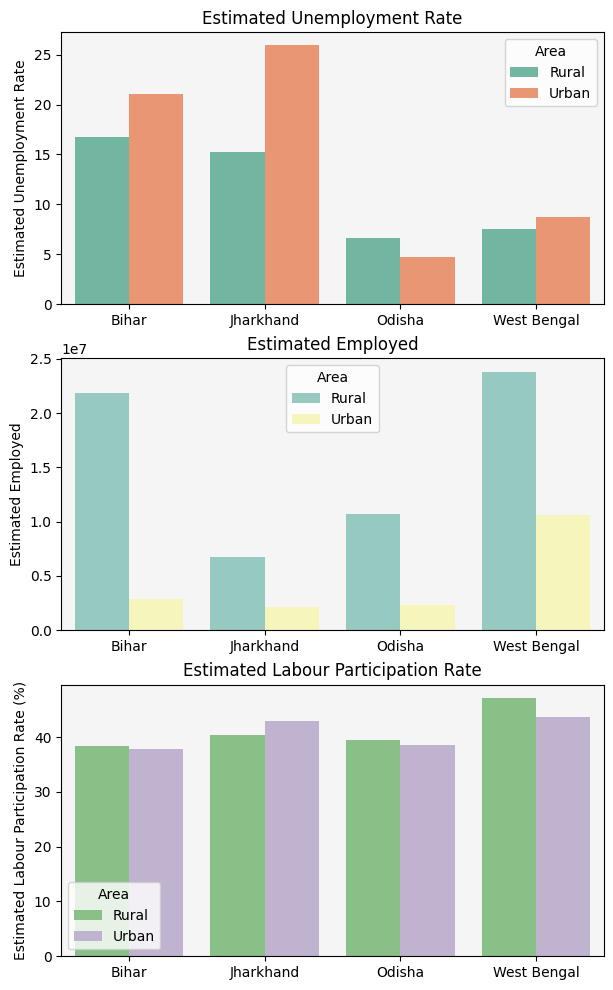

In [44]:
fig, axes = plt.subplots(3, 1, figsize=(7, 12))

sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data = df[(df['Zone'] == f'{zones[2]}')], 
            hue = 'Area',ax=axes[0], palette='Set2', errorbar=('ci', 0))
axes[0].set_xlabel('')
axes[0].set_ylabel('Estimated Unemployment Rate')
axes[0].set_facecolor('#f5f5f5')
axes[0].set_title(f"Estimated Unemployment Rate")

sns.barplot(x='Region', y='Estimated Employed', data = df[(df['Zone'] == f'{zones[2]}')], 
            hue = 'Area',ax=axes[1], palette='Set3', errorbar=('ci', 0))
axes[1].set_xlabel('')
axes[1].set_ylabel('Estimated Employed')
axes[1].set_facecolor('#f5f5f5')
axes[1].set_title(f"Estimated Employed")

sns.barplot(x='Region', y='Estimated Labour Participation Rate (%)', data = df[(df['Zone'] == f'{zones[2]}')], 
            hue = 'Area',ax=axes[2], palette='Accent', errorbar=('ci', 0))
axes[2].set_xlabel('')
axes[2].set_ylabel('Estimated Labour Participation Rate (%)')
axes[2].set_facecolor('#f5f5f5')
axes[2].set_title(f"Estimated Labour Participation Rate");

#### Eastern Region Observations :
- <span style="color:blue;font-size:16px">The Unemployment Rate is <b>Higher</b> in Urban areas than in Rural areas except Odisha.</span>
- <span style="color:blue;font-size:16px">The Employed Population is <b>Higher</b> in Rural areas than Urban areas.</span>
- <span style="color:blue;font-size:16px">The Labor Participation is <b>Higher</b> in Rural areas than Urban areas.</span>

### CENTRAL REGION

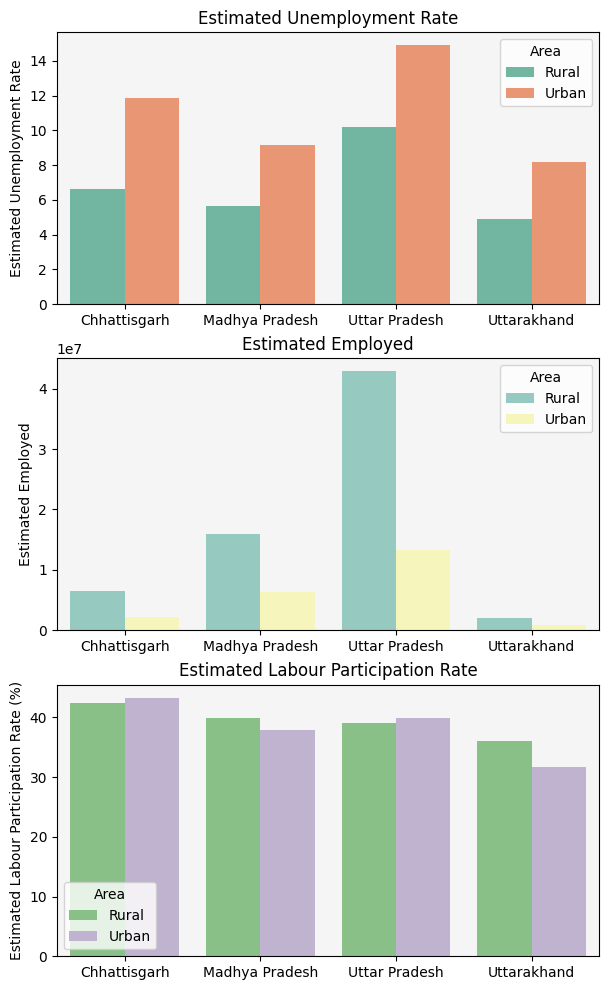

In [45]:
fig, axes = plt.subplots(3, 1, figsize=(7, 12))

sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data = df[(df['Zone'] == f'{zones[3]}')], 
            hue = 'Area',ax=axes[0], palette='Set2', errorbar=('ci', 0))
axes[0].set_xlabel('')
axes[0].set_ylabel('Estimated Unemployment Rate')
axes[0].set_facecolor('#f5f5f5')
axes[0].set_title(f"Estimated Unemployment Rate")

sns.barplot(x='Region', y='Estimated Employed', data = df[(df['Zone'] == f'{zones[3]}')], 
            hue = 'Area',ax=axes[1], palette='Set3', errorbar=('ci', 0))
axes[1].set_xlabel('')
axes[1].set_ylabel('Estimated Employed')
axes[1].set_facecolor('#f5f5f5')
axes[1].set_title(f"Estimated Employed")

sns.barplot(x='Region', y='Estimated Labour Participation Rate (%)', data = df[(df['Zone'] == f'{zones[3]}')], 
            hue = 'Area',ax=axes[2], palette='Accent', errorbar=('ci', 0))
axes[2].set_xlabel('')
axes[2].set_ylabel('Estimated Labour Participation Rate (%)')
axes[2].set_facecolor('#f5f5f5')
axes[2].set_title(f"Estimated Labour Participation Rate");

#### Central Region Observations :
- <span style="color:blue;font-size:16px">The Unemployment Rate is <b>Higher</b> in Urban areas than in Rural areas.</span>
- <span style="color:blue;font-size:16px">The Employed Population is much <b>3 times Higher</b> in Rural Uttar Pradesh than Urban Uttar Pradesh.</span>
- <span style="color:blue;font-size:16px">The Employed Population is <b>Higher</b> in Rural areas than Urban areas.</span>

### NORTHERN REGION

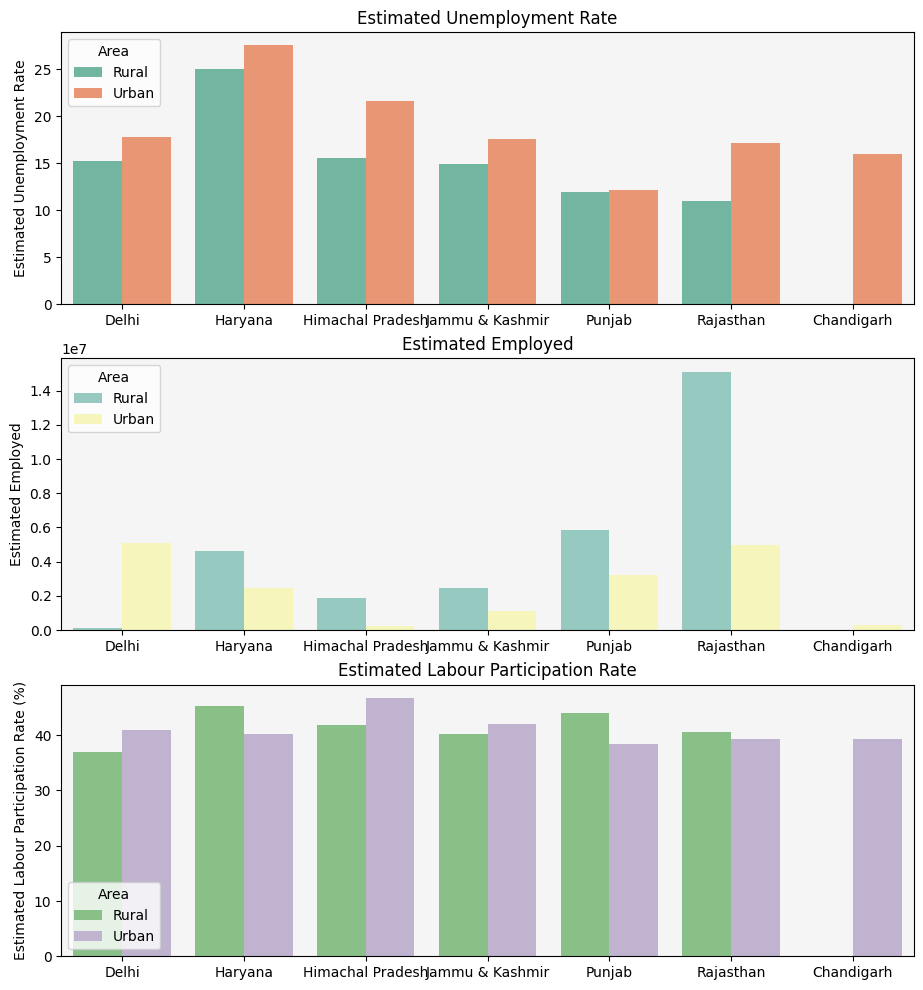

In [46]:
fig, axes = plt.subplots(3, 1, figsize=(11, 12))

sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data = df[(df['Zone'] == f'{zones[4]}')], 
            hue = 'Area',ax=axes[0], palette='Set2', errorbar=('ci', 0))
axes[0].set_xlabel('')
axes[0].set_ylabel('Estimated Unemployment Rate')
axes[0].set_facecolor('#f5f5f5')
axes[0].set_title(f"Estimated Unemployment Rate")

sns.barplot(x='Region', y='Estimated Employed', data = df[(df['Zone'] == f'{zones[4]}')], 
            hue = 'Area',ax=axes[1], palette='Set3', errorbar=('ci', 0))
axes[1].set_xlabel('')
axes[1].set_ylabel('Estimated Employed')
axes[1].set_facecolor('#f5f5f5')
axes[1].set_title(f"Estimated Employed")

sns.barplot(x='Region', y='Estimated Labour Participation Rate (%)', data = df[(df['Zone'] == f'{zones[4]}')], 
            hue = 'Area',ax=axes[2], palette='Accent', errorbar=('ci', 0))
axes[2].set_xlabel('')
axes[2].set_ylabel('Estimated Labour Participation Rate (%)')
axes[2].set_facecolor('#f5f5f5')
axes[2].set_title(f"Estimated Labour Participation Rate");

#### Northern Region Observations :
- <span style="color:blue;font-size:16px">Unemployment Rates in <b>same</b> in Punjab Rural and Urban areas.</span>
- <span style="color:blue;font-size:16px">Unemployment Rates in Haryana is <b>Higher</b> compared to other Northern states.</span>
- <span style="color:blue;font-size:16px">The Unemployment Rate is <b>Higher</b> in Urban areas than in Rural areas.</span>
- <span style="color:blue;font-size:16px">The Employed Population is much <b>Higher</b> in Urban Delhi than Rural Delhi.</span>
- <span style="color:blue;font-size:16px">The Employed Population is <b>Highest</b> in Rural Rajasthan.</span>

### WESTERN REGION

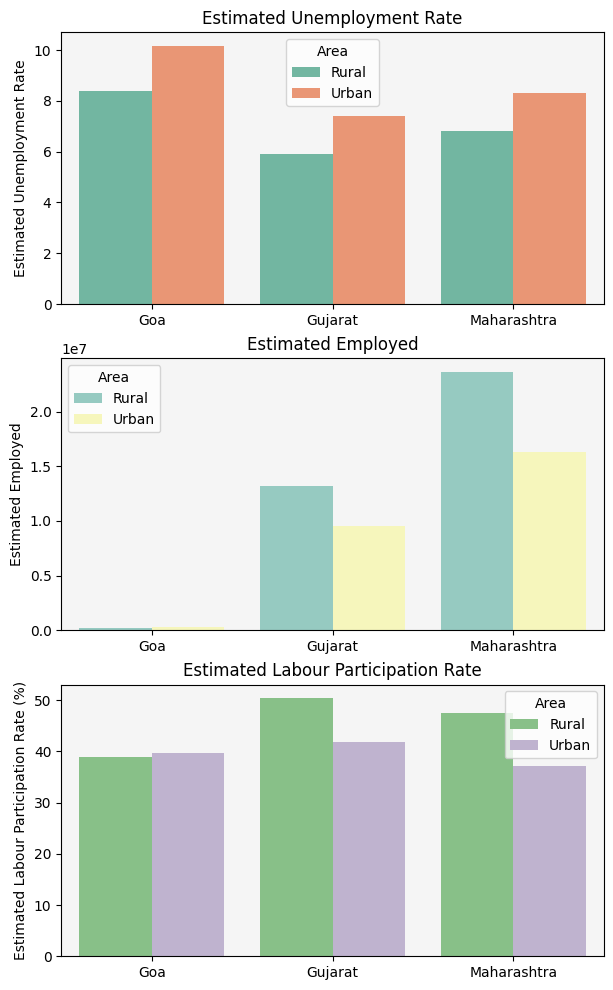

In [47]:
fig, axes = plt.subplots(3, 1, figsize=(7, 12))

sns.barplot(x='Region', y='Estimated Unemployment Rate (%)', data = df[(df['Zone'] == f'{zones[5]}')], 
            hue = 'Area',ax=axes[0], palette='Set2', errorbar=('ci', 0))
axes[0].set_xlabel('')
axes[0].set_ylabel('Estimated Unemployment Rate')
axes[0].set_facecolor('#f5f5f5')
axes[0].set_title(f"Estimated Unemployment Rate")

sns.barplot(x='Region', y='Estimated Employed', data = df[(df['Zone'] == f'{zones[5]}')], 
            hue = 'Area',ax=axes[1], palette='Set3', errorbar=('ci', 0))
axes[1].set_xlabel('')
axes[1].set_ylabel('Estimated Employed')
axes[1].set_facecolor('#f5f5f5')
axes[1].set_title(f"Estimated Employed")

sns.barplot(x='Region', y='Estimated Labour Participation Rate (%)', data = df[(df['Zone'] == f'{zones[5]}')], 
            hue = 'Area',ax=axes[2], palette='Accent', errorbar=('ci', 0))
axes[2].set_xlabel('')
axes[2].set_ylabel('Estimated Labour Participation Rate (%)')
axes[2].set_facecolor('#f5f5f5')
axes[2].set_title(f"Estimated Labour Participation Rate");

#### Western Region Observations :
- <span style="color:blue;font-size:16px">The Unemployment Rate is <b>Higher</b> in Urban areas than in Rural areas.</span>
- <span style="color:blue;font-size:16px">The Employed Population is <b>Highest</b> in Rural Maharashtra.</span>
- <span style="color:blue;font-size:16px">The Employed Population is much <b>Higher</b> in Rural areas than in Urban areas.</span>

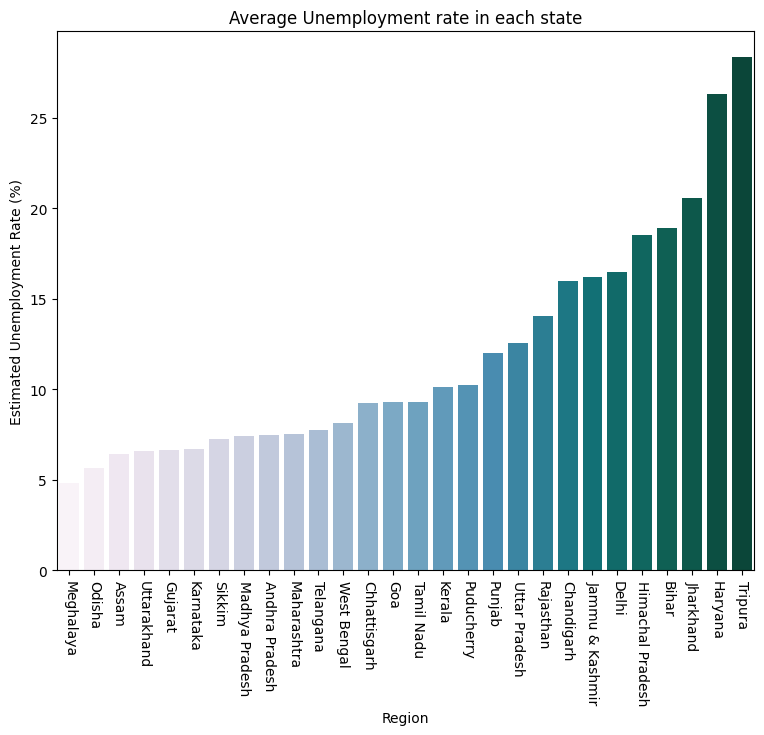

In [48]:
plot_unemp = df[['Estimated Unemployment Rate (%)','Region']]
df_unemployed = plot_unemp.groupby('Region').mean().reset_index()

df_unemployed = df_unemployed.sort_values('Estimated Unemployment Rate (%)')

plt.figure(figsize = (9,7))
sns.barplot(df_unemployed, x ='Region', y ='Estimated Unemployment Rate (%)', palette = 'PuBuGn')
plt.xticks(rotation = -90)
plt.title('Average Unemployment rate in each state');

Unemployment Rate is high in:
- <span style="color:blue;font-size:16px">Tripura</span>
- <span style="color:blue;font-size:16px">Haryana</span>
- <span style="color:blue;font-size:16px">Jharkhand</span>
- <span style="color:blue;font-size:16px">Bihar</span>
- <span style="color:blue;font-size:16px">Himachal Pradesh</span>

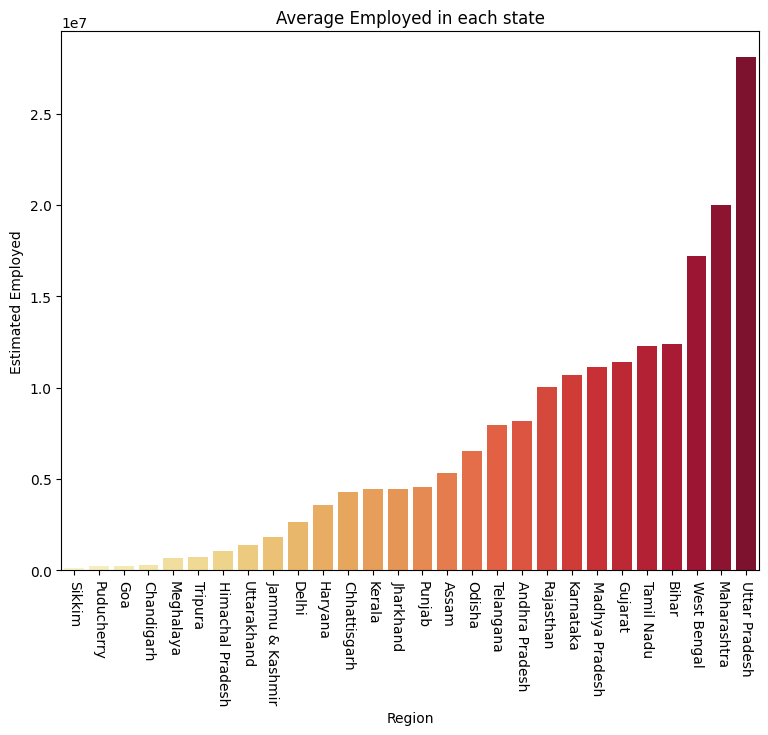

In [49]:
plot_emp = df[['Estimated Employed','Region']]
df_employed = plot_emp.groupby('Region').mean().reset_index()

df_employed = df_employed.sort_values('Estimated Employed')

plt.figure(figsize = (9,7))
sns.barplot(df_employed, x ='Region',y ='Estimated Employed', palette = 'YlOrRd')
plt.xticks(rotation = -90)
plt.title('Average Employed in each state');

Employed Population is high in:
- <span style="color:blue;font-size:16px">Uttar Pradesh</span>
- <span style="color:blue;font-size:16px">Maharashtra</span>
- <span style="color:blue;font-size:16px">West Bengal</span>
- <span style="color:blue;font-size:16px">Bihar</span>
- <span style="color:blue;font-size:16px">Tamil Nadu</span>

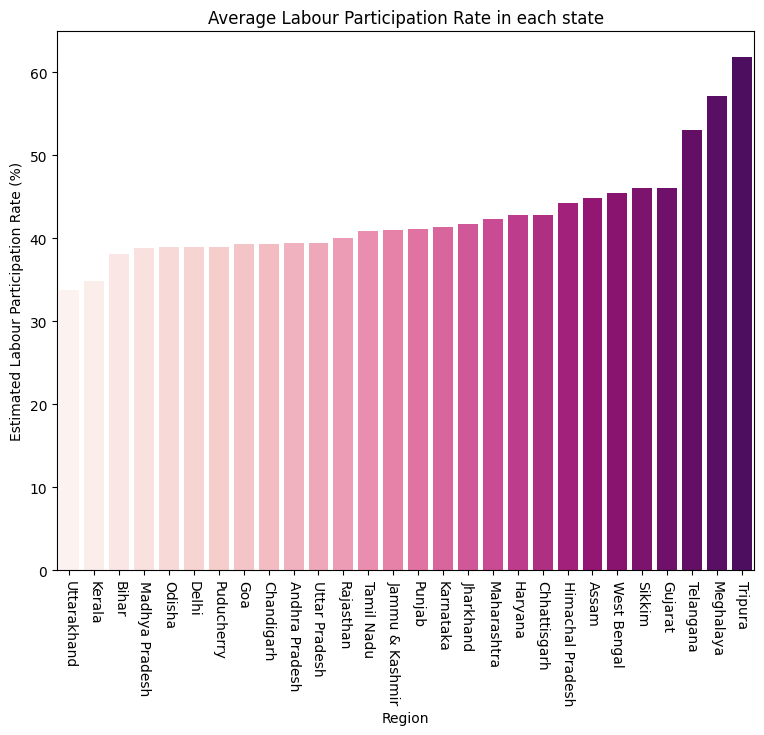

In [50]:
plot_labor = df[['Estimated Labour Participation Rate (%)','Region']]
df_labor = plot_labor.groupby('Region').mean().reset_index()

df_labor = df_labor.sort_values('Estimated Labour Participation Rate (%)')

plt.figure(figsize = (9,7))
sns.barplot(df_labor, x ='Region',y ='Estimated Labour Participation Rate (%)', palette = 'RdPu')
plt.xticks(rotation = -90)
plt.title('Average Labour Participation Rate in each state');

Labor Participation is high in:
- <span style="color:blue;font-size:16px">Tripura</span>
- <span style="color:blue;font-size:16px">Meghalaya</span>
- <span style="color:blue;font-size:16px">Telangana</span>
- <span style="color:blue;font-size:16px">Gujarat</span>
- <span style="color:blue;font-size:16px">Sikkim</span>

# After Effects of Lockdown

In [51]:
df2 = pd.read_csv('/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv')
df2.head(2)

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74


In [52]:
print(f"The number of Rows : {df2.shape[0]}\nThe number of columns : {df2.shape[1]}")

The number of Rows : 267
The number of columns : 9


In [53]:
new_columns = list(df2.columns)
new_columns = [col.strip() for col in new_columns]
df2.columns = new_columns

In [54]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Region                                   267 non-null    object 
 1   Date                                     267 non-null    object 
 2   Frequency                                267 non-null    object 
 3   Estimated Unemployment Rate (%)          267 non-null    float64
 4   Estimated Employed                       267 non-null    int64  
 5   Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                 267 non-null    object 
 7   longitude                                267 non-null    float64
 8   latitude                                 267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


In [55]:
df2['Region'].nunique()

27

<span style="color:blue;font-size:16px">There are <b>27 </b> different regions present in the dataset. </span>

In [56]:
df2.drop(['Frequency','Region.1','latitude','longitude'], axis = 1, inplace = True)

#### Getting the Month, Year and MM-YYYY from the feature "Date"

In [57]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Month'] = df2['Date'].dt.month
df2['Year'] = df2['Date'].dt.year
df2['MM YYYY'] = df2['Date'].dt.strftime('%m-%Y')

In [58]:
df.head()

,Region,Date,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,Month,Year,MM YYYY,Zone
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,5,2019,05-2019,Southern
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,6,2019,06-2019,Southern
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,7,2019,07-2019,Southern
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,8,2019,08-2019,Southern
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,9,2019,09-2019,Southern


### When was Lockdown in India?
<span style="color:blue;font-size:19px">25 Mar 2020 – 31 May 2020</span>

We have already seen the effects during Lockdown. It was during April and May 2020. Let's look at the after effects of lockdown. I have also included May 2020 to understand how it has changed.

In [59]:
after = df2[df2.Month >= 5]

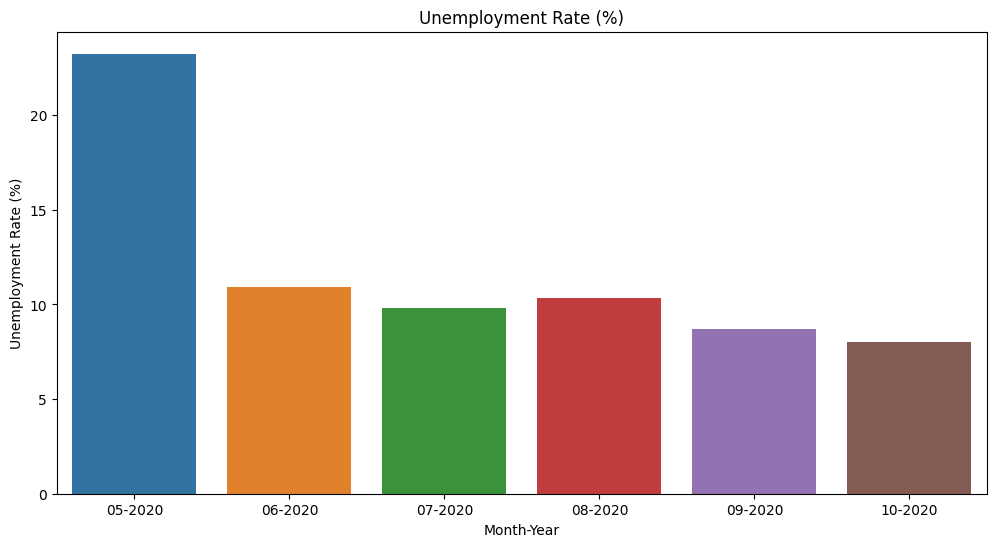

In [60]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Unemployment Rate (%)', data = after, errorbar=('ci', 0))
plt.xlabel('Month-Year')
plt.ylabel('Unemployment Rate (%)')
plt.title("Unemployment Rate (%)");

<span style="color:blue;font-size:16px">Unemployment Rate is around 8 - 11% after the lockdown. During Lockdown, it was around 24%.</span>

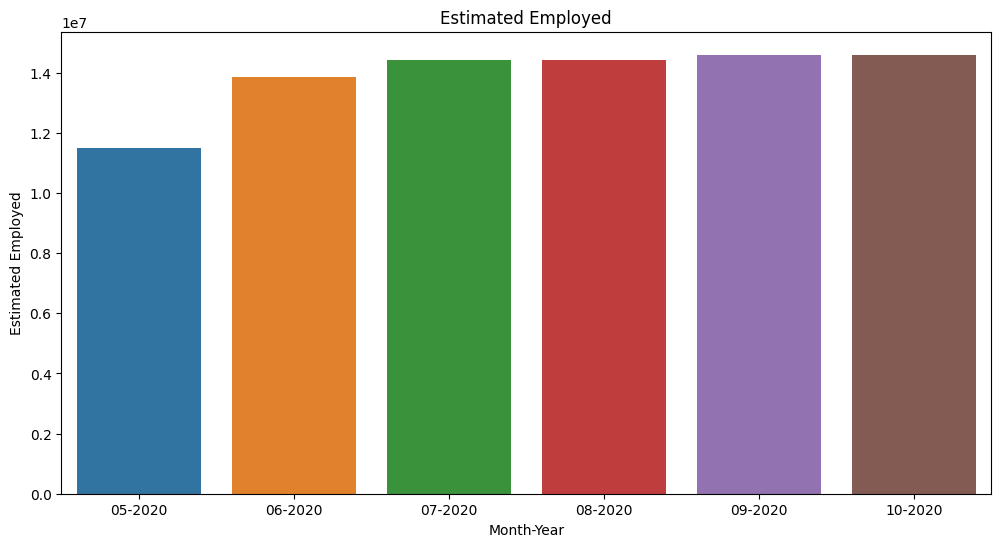

In [61]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Employed', data = after, errorbar=('ci', 0))
plt.xlabel('Month-Year')
plt.ylabel('Estimated Employed')
plt.title("Estimated Employed");

<span style="color:blue;font-size:16px">The Employed Population is around 1.39 crores - 1.43 crores after lockdown. During Lockdown, it was 1.28 crores.</span>

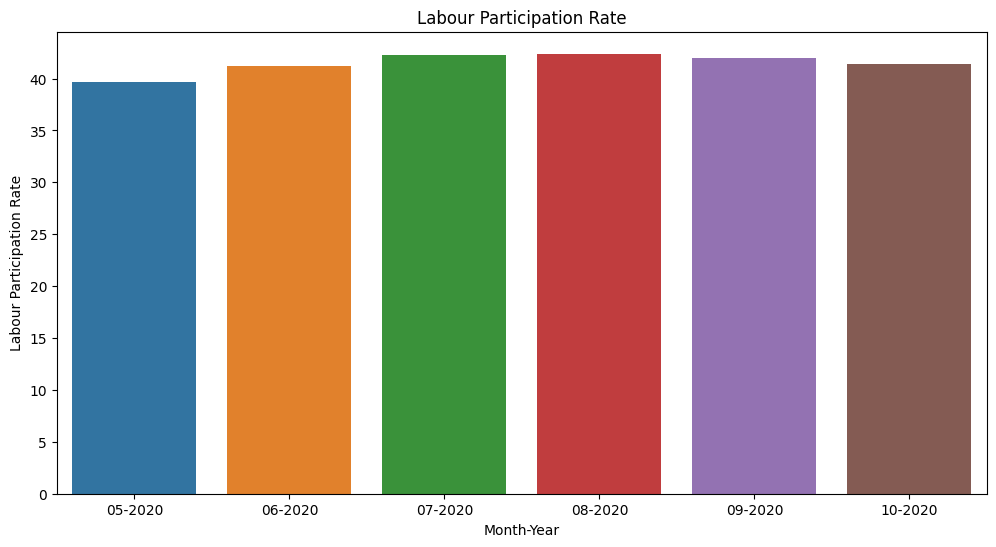

In [62]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'MM YYYY', y = 'Estimated Labour Participation Rate (%)', data = after, errorbar=('ci', 0))
plt.xlabel('Month-Year')
plt.ylabel('Labour Participation Rate')
plt.title("Labour Participation Rate");

<span style="color:blue;font-size:16px">There seems to be no much difference in the Labor Participation after lockdown. </span>

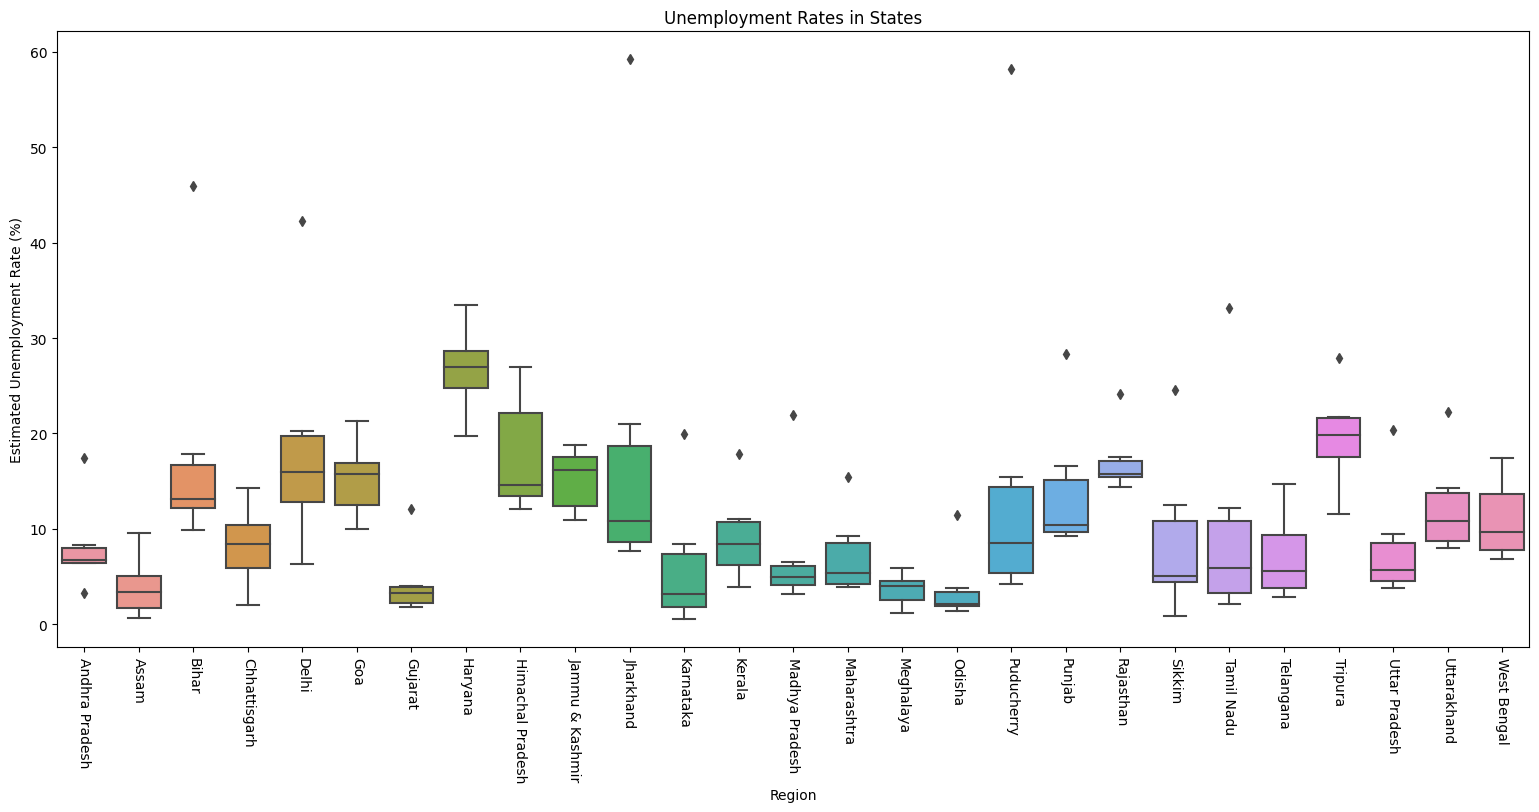

In [63]:
plt.figure(figsize=(19, 8))

sns.boxplot(after, x = 'Region', y = 'Estimated Unemployment Rate (%)')
plt.xticks(rotation = -90)
plt.title("Unemployment Rates in States");

#### Lockdown has affected employment in:
- <span style="color:blue;font-size:16px">Tripura</span>
- <span style="color:blue;font-size:16px">Haryana</span>
- <span style="color:blue;font-size:16px">Delhi</span>
- <span style="color:blue;font-size:16px">Jammu and Kashmir</span>
- <span style="color:blue;font-size:16px">Rajasthan</span>
- <span style="color:blue;font-size:16px">Himachal Pradesh</span>
- <span style="color:blue;font-size:16px">Bihar</span>